In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
newspaperdata=pd.read_csv("C:\\Users\\PRIYANKA\\Downloads\\NewspaperData.csv")
newspaperdata.head(2)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298


In [3]:
newspaperdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


### CORRELATION

In [4]:
newspaperdata.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


C:\Users\PRIYANKA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


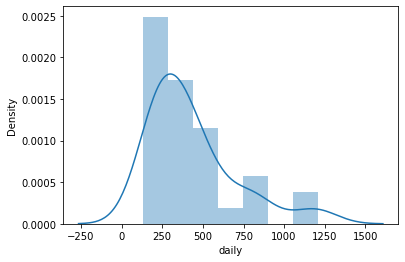

In [5]:
import seaborn as sns
sns.distplot(newspaperdata['daily'])
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='sunday', ylabel='Density'>

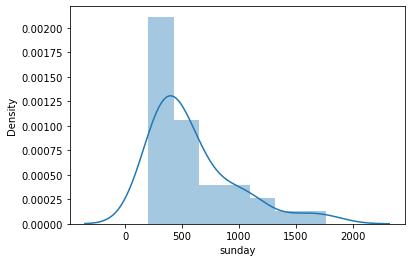

In [6]:
import seaborn as sns
sns.distplot(newspaperdata['sunday'])

### FITTING A LINEAR REGRESSION MODEL

In [7]:
from scipy import stats
import statsmodels.formula.api as smf
model= smf.ols("sunday~daily",data=newspaperdata).fit()

<AxesSubplot:xlabel='daily', ylabel='sunday'>

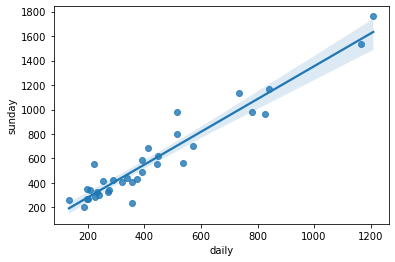

In [8]:
sns.regplot(x='daily',y='sunday',data=newspaperdata)

In [9]:
#coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [10]:
# t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [11]:
#Rsquared values
print(model.rsquared)
#its an excellent equation as its value is 0.9

0.9180596895873295


###   PREDICTION OF NEW DATA


In [12]:
#Predict for 200 and 300 daily circulations
NEWnewspaperdata=pd.Series([200,300])

In [13]:
NEWnewspaperdata

0    200
1    300
dtype: int64

In [14]:
NEWnewspaperdata_pred=pd.DataFrame(NEWnewspaperdata,columns=['daily'])

In [15]:
NEWnewspaperdata_pred

,daily
0,200
1,300


In [16]:
model.predict(NEWnewspaperdata_pred)

0    281.778581
1    415.750057
dtype: float64

### THE WAIST CIRCUMFERENCE -ADIPOSE TISSUE DATA

In [17]:
wc_at_data=pd.read_csv("C:\\Users\\PRIYANKA\\Downloads\\WC_AT.csv")
wc_at_data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [18]:
wc_at_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [19]:
wc_at_data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [20]:
#here the correlation is 0.8 it is a good regression

<AxesSubplot:xlabel='Waist', ylabel='Density'>

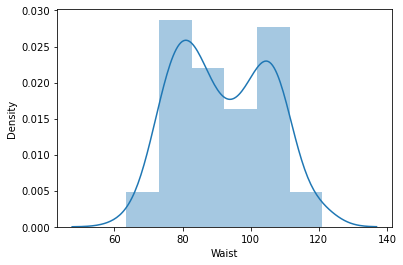

In [21]:
import seaborn as sns
sns.distplot(wc_at_data['Waist'])

<AxesSubplot:xlabel='AT', ylabel='Density'>

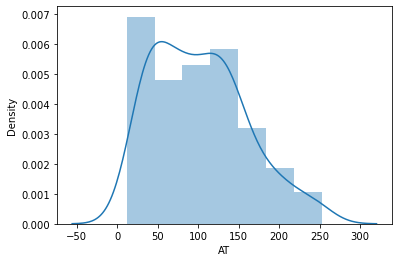

In [22]:
import seaborn as sns
sns.distplot(wc_at_data['AT'])

In [23]:
from scipy import stats
import statsmodels.formula.api as smf
model= smf.ols("AT~Waist",data=wc_at_data).fit()

<AxesSubplot:xlabel='AT', ylabel='Waist'>

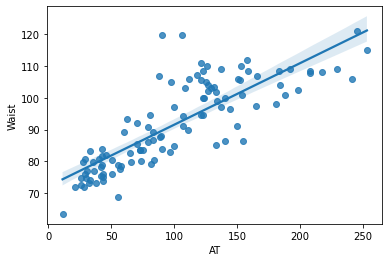

In [24]:
sns.regplot(x='AT',y='Waist',data=wc_at_data)

In [25]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [26]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [27]:
print(model.rsquared)


0.670036893052843


In [32]:
wc_at_newdata=([65,150,40])

In [33]:
wc_at_newdata_pred=pd.DataFrame(wc_at_newdata,columns=['Waist'])

In [34]:
wc_at_newdata_pred

,Waist
0,65
1,150
2,40


In [35]:
model.predict(wc_at_newdata_pred)

0      8.844373
1    302.847421
2    -77.627112
dtype: float64

In [37]:
wc_at_data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000
